In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("C:/4-ai/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


df.drop(columns=[

In [11]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [28]:
df.duplicated().sum()

0

In [30]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [37]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

there are less customer from spain, more are from France

In [40]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [42]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [44]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [54]:
X=df.drop(columns=["Exited"])
y=df["Exited"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [58]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [70]:
X_train.shape

(8000, 11)

In [72]:
y_train.shape

(8000,)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [94]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [84]:
#now let us define ANN model

In [98]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [106]:
model.compile(optimizer="Adam",loss="binary_crossentropy")

In [108]:
#let us train the model
history=model.fit(X_train_trf,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - loss: 0.4262
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.4189
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.4284
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.4307
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.4233
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.4184
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.4278
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.4266
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.4242
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.4240


now let us check final weights after training

In [111]:
model.layers[0].get_weights()

[array([[ 1.2760127e-01, -2.3908868e-02,  1.5111305e-01],
        [-1.1038375e+00, -1.4291267e+00, -1.5531123e+00],
        [ 2.6909873e-01, -2.9293939e-01,  2.8337529e-01],
        [ 2.4354084e-01, -5.2885127e-01, -2.2748141e-01],
        [ 6.7329936e-02,  6.5428048e-02,  1.5297632e-01],
        [-1.1282635e-03, -7.9968898e-03,  4.2690292e-02],
        [ 7.8180748e-01,  4.2608485e-01,  4.5004544e-01],
        [-3.1700349e-01, -1.2256252e-04,  8.1627212e-02],
        [-6.4154679e-01, -3.1817463e-01, -5.8672088e-01],
        [-2.1076836e-01,  2.8530350e-01, -2.3990558e-01],
        [ 6.0759598e-01,  2.1013384e-01,  4.4330415e-01]], dtype=float32),
 array([ 0.10765729, -0.05698076,  0.02048632], dtype=float32)]

In [113]:
model.layers[1].get_weights()

[array([[-0.9437945],
        [-1.2413719],
        [-1.5918825]], dtype=float32),
 array([0.27512366], dtype=float32)]

In [119]:
Y_log=model.predict(X_test_trf)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


In [121]:
#predicted result is trums of probability since you are using sigmoid activation
#if the output is less than o.5  then output 0 meance customer will
#leave the bank and if output is greater than 0.5 then 1 mence customer will
#retain the bank

In [127]:
Y_pred=np.where(Y_log>0.5,1,0)

In [131]:
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8045

In [137]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#11*11+11 bias 11*11+11


In [139]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [147]:
#let us train the model
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7241 - loss: 0.5888 - val_accuracy: 0.7969 - val_loss: 0.4794
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4689 - val_accuracy: 0.7962 - val_loss: 0.4496
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4324 - val_accuracy: 0.7981 - val_loss: 0.4313
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8057 - loss: 0.4069 - val_accuracy: 0.8100 - val_loss: 0.4181
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8235 - loss: 0.4000 - val_accuracy: 0.8244 - val_loss: 0.4078
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8377 - loss: 0.3764 - val_accuracy: 0.8294 - val_loss: 0.4000
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.3740 - val_accuracy: 0.8425 - val_loss: 0.3903
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.3664 - val_accu

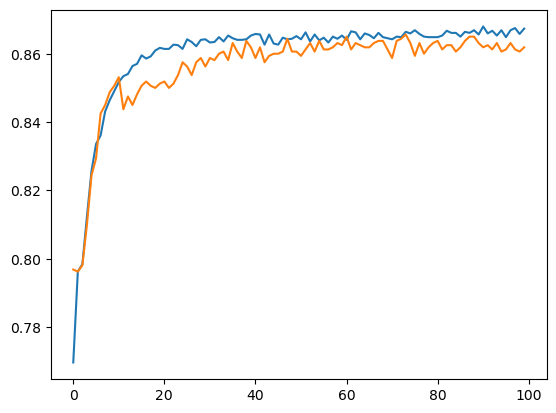

In [159]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [153]:
Y_log=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [155]:
Y_pred=np.where(Y_log>0.5,1,0)

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8045

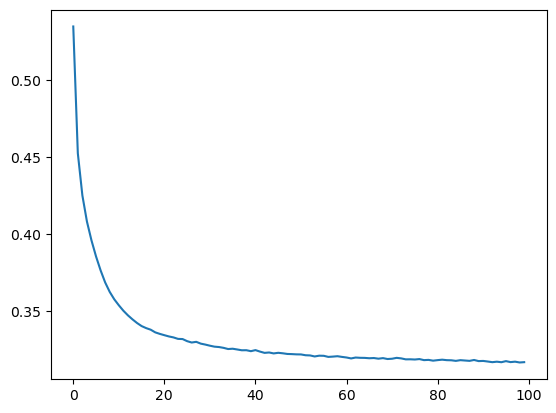

In [164]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])

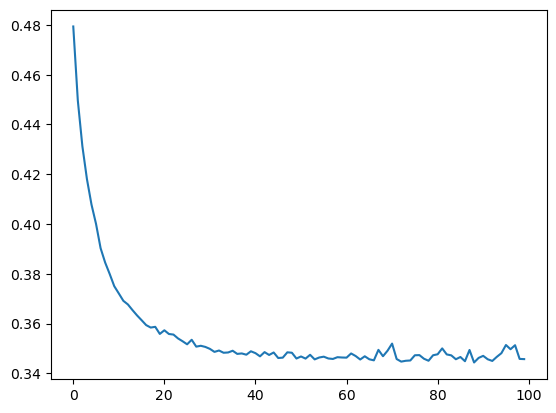

In [166]:
plt.plot(history.history["val_loss"])

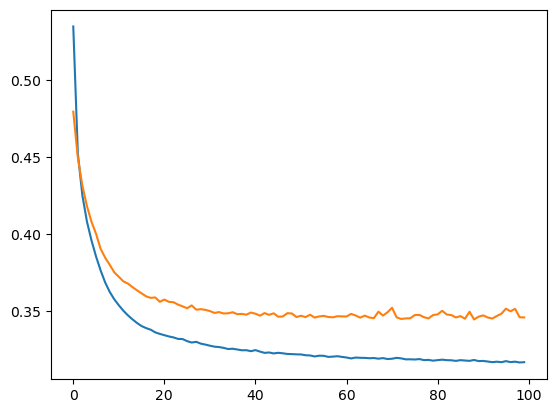

In [168]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])